<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
##Lets take a look at the Ames Iowas housing dadaset:
iowa_df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv")

In [0]:
#first few rows
print(iowa_df.head(3))
print (iowa_df.shape)

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500

[3 rows x 81 columns]
(1460, 81)


In [0]:
#Describe
iowa_df["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [0]:
iowa_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [0]:
#Specific columns hold specific kind of data
pd.set_option("display.max_row", 100)
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

ome columns hold integer values like the BedroomAbvGr which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

In [0]:
iowa_df[["BedroomAbvGr", "Fireplaces"]].head(4)

,BedroomAbvGr,Fireplaces
0,3,0
1,3,1
2,3,1
3,3,1


In [0]:
iowa_df[['Fireplaces']].sample(4)

,Fireplaces
735,2
702,1
719,1
628,2


another way to call columns: dot method

iowa_df.Fireplaces.sample(4)

In [0]:
iowa_df.Fireplaces.sample(4)

200     0
1046    1
270     1
257     1
Name: Fireplaces, dtype: int64

In [0]:
iowa_df["one bedroon above gr"]=iowa_df["Fireplaces"]

In [0]:
iowa_df[["one bedroon above gr", "Fireplaces", "BedroomAbvGr"]].sample(4)

,one bedroon above gr,Fireplaces,BedroomAbvGr
251,1,1,2
139,0,0,3
1319,0,0,3
1067,0,0,4


In [0]:
iowa_df.one bedroom above gr.sample(4)

SyntaxError: ignored

In [0]:
## Look at the first ten rows of the `BedroomAbvGr` column.
iowa_df["LotFrontage"].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

Hmmm, do the values above look like floats to you?
They all have .0 on them so technically they're being stored as floats, but should they be stored as floats?
Lets see what all of the possible values for this column are.

In [0]:
iowa_df["LotFrontage"].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

Looks to me like the LotFrontage column originally held integer values but was cast to a float meaning that each original integer values was converted to its corresponding float representation.
Any guesses as to why that would have happened?
HINT: What's the most common LotFrontage value for this column?

In [0]:
import numpy as np

NaN stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes.
This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?
Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?
Perhaps some of this data is truly missing or unrecorded data, but sometimes NaNs are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.
Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [0]:
type(np.nan)

float

The datatype of a NaN is float! This means that if we have a column of integer values, but the column has even a single NaN that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.
You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.


In [0]:
#how much missing data
iowa_df["LotFrontage"].isnull().sum()

259

In [0]:
#drop the missing data
iowa_df["LotFrontage"].dropna(inplace=True)

In [0]:
#now how much missing data
iowa_df["LotFrontage"].isnull().sum()

0

Making new Features

Lets slim down the dataset and consider just a few specific columns:

TotalBsmtSF

1stFlrSF

2ndFlrSF

SalePrice1


In [0]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets

small_df=iowa_df[['TotalBsmtSF', "1stFlrSF", "2ndFlrSF", "SalePrice"]].copy()
small_df.sample(4)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
327,1383,1383,0,145250
1410,944,944,896,230000
59,780,780,0,124900
1301,771,753,741,177500


In [0]:
## Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
small_df["TotalSqFt"] = small_df["TotalBsmtSF"] + small_df["1stFlrSF"] + small_df["2ndFlrSF"]
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSqFt
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [0]:
small_df["PricePerSqFt"] = small_df["SalePrice"]/small_df['TotalSqFt']
small_df.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSqFt,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


Ok, we have made two new columns on our small dataset.

What does a high PricePerSqFt say about a home that the square footage and price alone don't capture as directly?

What does a low PricePerSqFt say about a home that the square footage and price alone don't directly capture?

In [0]:
#crosstabs
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
## what are some categorical columns?
iowa_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [0]:
#Values of sale condition
iowa_df["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
#create a new catagorical variable 
iowa_df["NormalCondition"] = np.where(iowa_df["SaleCondition"]=="Normal", "Yes", "No")
iowa_df["NormalCondition"].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [0]:
#Value counts of catagorical variable
iowa_df["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
#Map this from four down to three
iowa_df["LotShape3"] = iowa_df["LotShape"].map({"Reg":"Regular", "IR1":"Irregular", "IR2":"Other", "IR3":"Other"})
iowa_df["LotShape3"].value_counts()


Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [0]:
iowa_df["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
#onemore way to map catagorical variables
iowa_df["Neighborhood"].value_counts().head()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [0]:
iowa_df["Top_neighbors"]="All Others"
iowa_df.loc[iowa_df["Neighborhood"]=="NAmes", "Top_neighbors"]="NorthAmes Neighbors"
iowa_df.loc[iowa_df["Neighborhood"]=="CollgCr", "Top_neighbors"]="Creek Neighbors"
iowa_df.loc[iowa_df["Neighborhood"]=="OldTown", "Top_neighbors"] = "Old Town neighbors"
iowa_df["Top_neighbors"].value_counts()

All Others             972
NorthAmes Neighbors    225
Creek Neighbors        150
Old Town neighbors     113
Name: Top_neighbors, dtype: int64

In [0]:
#crosstabs
pd.crosstab(iowa_df['Top_neighbors'], iowa_df["LotShape3"])

LotShape3,Irregular,Other,Regular
Top_neighbors,,,
All Others,354,36,582
Creek Neighbors,53,11,86
NorthAmes Neighbors,66,2,157
Old Town neighbors,11,2,100


In [0]:
pd.crosstab(iowa_df['Top_neighbors'], iowa_df["LotShape3"],margins=True)

LotShape3,Irregular,Other,Regular,All
Top_neighbors,,,,
All Others,354,36,582,972
Creek Neighbors,53,11,86,150
NorthAmes Neighbors,66,2,157,225
Old Town neighbors,11,2,100,113
All,484,51,925,1460


In [0]:
#all proportions
pd.crosstab(iowa_df['Top_neighbors'], iowa_df["LotShape3"],normalize='index',margins=True)

LotShape3,Irregular,Other,Regular
Top_neighbors,,,
All Others,0.364198,0.037037,0.598765
Creek Neighbors,0.353333,0.073333,0.573333
NorthAmes Neighbors,0.293333,0.008889,0.697778
Old Town neighbors,0.097345,0.017699,0.884956
All,0.331507,0.034932,0.633562


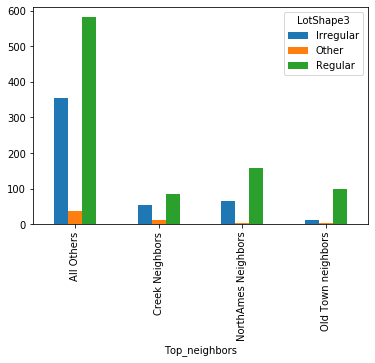

In [0]:
#display that

my_result = pd.crosstab(iowa_df['Top_neighbors'], iowa_df["LotShape3"])
my_result.plot(kind='bar');

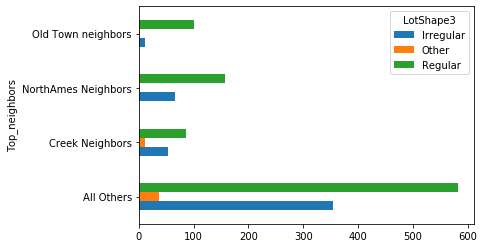

In [0]:
#flip that plot
my_result.plot(kind="barh");

In [0]:
import seaborn as sns

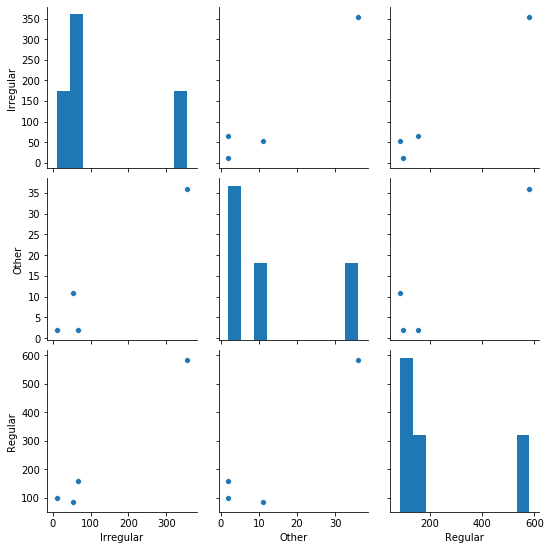

In [0]:
sns.pairplot(my_result)

Challenge
I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning."
We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.


Objective Work with Strings with Pandas

Overview
So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

Follow Along
We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.
The !wget shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file.
Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the !wget command to bring files directly into your notebook's memory.
# New Section

In [2]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-17 20:18:51--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 35.160.201.244, 34.214.150.56, 34.223.179.218
Connecting to resources.lendingclub.com (resources.lendingclub.com)|35.160.201.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [         <=>        ]  21.71M  1.67MB/s    in 12s     

2020-03-17 20:19:04 (1.77 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22763850]



In [3]:
!unzip LoanStats_2018Q4.csv.zip.1

Archive:  LoanStats_2018Q4.csv.zip.1
  inflating: LoanStats_2018Q4.csv    


In [6]:
#read the csv file
loans_df = pd.read_csv("LoanStats_2018Q4.csv")
loans_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid         n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100   

In [7]:
loans_df.shape

(128287, 1)

The extra rows at the top and bottom of the file have done two things:
1) The top row has made it so that the entire dataset is being interpreted as column headers
2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two NaN values in it.

In [8]:
loans_df = pd.read_csv("LoanStats_2018Q4.csv", header=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [0]:
loans_df = pd.read_csv("LoanStats_2018Q4.csv", skiprows=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [0]:
pd.set_option("display.max_rows", 100)
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

For good measure, we'll also drop some columns that are made up completely of NaN values.
Why might LendingClub have included columns in their dataset that are 100% blank?

Clean up the int_rate column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words.
Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the int_rate column

In [0]:
#look at the first 10 values of the int_rate column
loans_df["int_rate"].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [0]:
#look at the specific value from the int_rate column
loans_df["int_rate"][10]

' 19.92%'

In [0]:
#confirm that
type(loans_df["int_rate"][10])

str

Problems that we need to address with this column:
String column that should be numeric
Percent Sign % included with the number
Leading space at the beginning of the string
However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.

In [0]:
#lets fix one string and apply to all
int_rate = ' 19.92%'

In [0]:
#remove the leading space
int_rate.strip()

'19.92%'

In [0]:
int_rate.strip().strip('%')

'19.92'

In [0]:
#"cast" that string value to a float
float('19.92') + 15

34.92

In [0]:
#put it all together
type(float(int_rate.strip().strip("%")))

float

Apply our solution to every cell in a column



In [0]:
#write a function that can do the same thing we have done to all the element in the column
#you will do that by creating a function
def myfunc (cell_content):
  return float(cell_content.strip().strip("%"))


In [0]:
myfunc(int_rate)

19.92

In [0]:
#test the function by calling in on out exapmle
type(myfunc(int_rate))

float

In [0]:
new_list=[]

In [0]:
#create a for loop to apply the myfunc to all the element in the column
for cell in loans_df["int_rate"]:
  new_list.append(myfunc(cell))

In [0]:
#llok at the first 10 values of the list
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [0]:
#comparing it to the original value
list(loans_df["int_rate"][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [0]:
#convert that list to a new column
loans_df['int_rate_cleaned']=pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [0]:
#what type of data is held in our column
loans_df[["int_rate", "int_rate_cleaned"]].dtypes

int_rate             object
int_rate_cleaned    float64
dtype: object

In [0]:
#improve all of this code using a .apply function
loans_df["int_rate_cleaned2"] = loans_df["int_rate"].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned', 'int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned,int_rate_cleaned2
0,16.14%,16.14,16.14
1,11.80%,11.80,11.80
2,11.31%,11.31,11.31
3,14.47%,14.47,14.47
4,27.27%,27.27,27.27


**Convert the term column from string to integer.**

In [0]:
loans_df["term"][10]

' 60 months'

In [0]:
type(loans_df["term"][10])

str

In [0]:
term = ' 60 months'

In [0]:
term.strip().strip(' months')

'60'

In [0]:
type(term.strip().strip(' months'))

str

In [0]:
int(term.strip().strip(' months'))

60

In [0]:
type(int(term.strip().strip(' months')))

int

In [0]:
def myfunc1 (cellcontent1):
  return int(cellcontent1.strip().strip(' months'))


In [0]:
type(myfunc1(term))

int

In [0]:
loans_df['term_cleaned'] = loans_df['term'].apply(myfunc1)
loans_df[['term', "term_cleaned"]].head()

,term,term_cleaned
0,60 months,60
1,36 months,36
2,36 months,36
3,60 months,60
4,60 months,60


**Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.**

In [0]:
loans_df["loan_status"].value_counts()

Current               92485
Fully Paid            24821
Charged Off            6766
Late (31-120 days)     2210
In Grace Period        1405
Late (16-30 days)       486
Default                 111
Name: loan_status, dtype: int64

In [0]:
loans_df['loan_status_is_great'] = loans_df["loan_status"].map({"Current":"1",
                                                                 "Fully Paid":"1",
                                                                 "Charged Off":"0",
                                                                 "Late (31-120 days)":"0",
                                                                 "In Grace Period":"0",
                                                                 "Late (16-30 days)":"0",
                                                                 "Default":"0"
                                                                 })
loans_df["loan_status_is_great"].value_counts()

1    117306
0     10978
Name: loan_status_is_great, dtype: int64

In [0]:
loans_df[["loan_status", "loan_status_is_great"]].head(20)

,loan_status,loan_status_is_great
0,Fully Paid,1
1,Current,1
2,Fully Paid,1
3,Late (31-120 days),0
4,Current,1
5,Current,1
6,Current,1
7,Current,1
8,Fully Paid,1
9,Fully Paid,1


In [0]:
loans_df["loan_status_is_great"].describe()

count     128284
unique         2
top            1
freq      117306
Name: loan_status_is_great, dtype: object

In [0]:
loans_df["loan_status_is_great"][4]

'1'

In [0]:
type(loans_df["loan_status_is_great"][4])

str

In [0]:
loan_stat = '1'

In [0]:
type(loan_stat)

str

In [0]:
def myfunc3 (cellcontent3):
  return int(cellcontent3)

In [0]:
type(myfunc3(loan_stat))

int

In [0]:
loans_df["loan_status_is_great"].apply(myfunc3)
loans_df[['loan_status','loan_status_is_great']].head()

,loan_status,loan_status_is_great
0,Fully Paid,1
1,Current,1
2,Fully Paid,1
3,Late (31-120 days),0
4,Current,1


Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the .apply() function to... well... apply those changes to an entire column.

Objective Modify and Create Columns using .apply()

Overview
We're already seen one example of using the .apply() function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.
Remember, the goal here is to write a function that will work correctly on any individual cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the .apply() function.
Lets clean up the emp_title "Employment Title" column!
Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [11]:
# look at the top 20 rows
loans_df["emp_title"].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [14]:

loans_df["emp_title"].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [16]:
#how many different inique employment titles are there currently
len(loans_df["emp_title"].unique())

43852

In [17]:
#another way to do this
loans_df["emp_title"].nunique()

43851

In [18]:
# How often is the employment_title null?
loans_df["emp_title"].isnull().sum()

20922

In [0]:
import numpy as np

**What are some possible reasons as to why a person's employment title may have not been provided?**

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [0]:
#Write a function to clean up these use cases and increase uniformity.
def clean_title (job_title):
  if isinstance (job_title, str):
    return job_title.title().strip()
  else:
   return "unknown"

In [20]:
# do that same function in individual steps
print(type('Owner'))
isinstance('Owner', str)

<class 'str'>


True

In [24]:
# what about the strip?
" superVisor".title().strip()

'Supervisor'

In [30]:
# test our function
clean_title(' superVisor')

'Supervisor'

In [38]:
# create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [39]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(jobtitle) for jobtitle in   examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
loans_df["emp_title_cleaned"]=loans_df["emp_title"].apply(clean_title)

In [45]:
#check our result
loans_df[["emp_title", "emp_title_cleaned"]].sample(10)

,emp_title,emp_title_cleaned
105668,Food Service,Food Service
17521,catering driver,Catering Driver
6089,Field Service Engineer,Field Service Engineer
75528,Teller,Teller
105022,Cyber Systems Operator,Cyber Systems Operator
81928,Football Ciach,Football Ciach
36052,Inspector,Inspector
51715,Social worker,Social Worker
46524,Maintenance,Maintenance
17685,NaN,unknown


**We can use the same code as we did earlier to see how much progress was made.**

In [53]:
# Look at the top 20 employment titles
loans_df['emp_title'].value_counts().head(20)

Teacher                     2088
Manager                     1771
Registered Nurse             950
Driver                       924
RN                           724
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               520
Owner                        420
Director                     402
Truck Driver                 387
Operations Manager           387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     268
Name: emp_title, dtype: int64

In [51]:
loans_df["emp_title_cleaned"].nunique()

34877

In [54]:
# recoding a categorical
loans_df['new_emp_title']='All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title' ]='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title' ]='Teacher'
loans_df['new_emp_title'].value_counts()


All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [55]:
# How often is the employment_title null (NaN)?
loans_df['emp_title_cleaned'].isnull().sum()

0

Challenge
Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. **bold text**

**Objective Work with Dates and Times with Pandas**

Overview
Pandas has its own datatype datatype that makes it extremely convenient to convert strings that are in standard date formates to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion.

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting .dt to access specific parts of the date (year, month, day) to generate useful columns on a dataframe

Follow Along


Work with Dates

pandas documentation
to_datetime
Time/Date Components "You can access these properties via the .dt accessor"
Many of the most useful date columns in this dataset have the suffix _d to indicate that they correspond to dates.
We'll use a list comprehension to print them out
**bold text**

In [58]:
#list all column
loans_df.columns[:30]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

In [59]:
#check out one column
loans_df["issue_d"].head()


0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [60]:
#as a for loop
my_list = []
for col in loans_df.columns:
  if col.endswith("_d"):
    my_list.append(col)
my_list

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
#as a list comprehension
my_date_cols = [col for col in loans_df.columns if col.endswith("_d")]


Lets look at the string format of the issue_d column

In [63]:
loans_df["issue_d"][0]

'Dec-2018'

In [65]:
loans_df["issue_d"].dtype

dtype('O')

In [66]:
print(loans_df["issue_d"][0])
type(loans_df["issue_d"][0])

Dec-2018


str

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [67]:
# infer_datetime_format=True
pd.to_datetime(loans_df["issue_d"])

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
            ...    
128279   2018-10-01
128280   2018-10-01
128281   2018-10-01
128282   2018-10-01
128283   2018-10-01
Name: issue_d, Length: 128284, dtype: datetime64[ns]

In [70]:
loans_df["new_issue_d"]=pd.to_datetime(loans_df["issue_d"], infer_datetime_format=True)
loans_df[["issue_d", "new_issue_d"]]

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01
...,...,...
128279,Oct-2018,2018-10-01
128280,Oct-2018,2018-10-01
128281,Oct-2018,2018-10-01
128282,Oct-2018,2018-10-01


In [102]:
loans_df['issue_d'].isnull().sum()

0

In [73]:
#check our work
type(loans_df["new_issue_d"][10])
print(loans_df["new_issue_d"].dtype)


datetime64[ns]


Now we can see that the issue_d column has been changed to hold datetime objects.
Lets look at one of the cells specifically to see what a datetime object looks like:


In [74]:
loans_df["new_issue_d"].iloc[0]

Timestamp('2018-12-01 00:00:00')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [75]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

we can use the .dt accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the issue_d column

In [76]:
loans_df['year'] = loans_df["new_issue_d"].dt.year
loans_df[["issue_d", 'new_issue_d', 'year']].sample(7)

,issue_d,new_issue_d,year
8320,Dec-2018,2018-12-01,2018
116350,Oct-2018,2018-10-01,2018
119909,Oct-2018,2018-10-01,2018
52180,Nov-2018,2018-11-01,2018
57777,Nov-2018,2018-11-01,2018
51346,Nov-2018,2018-11-01,2018
46706,Nov-2018,2018-11-01,2018


Now the Month

In [78]:
loans_df['month'] = loans_df["new_issue_d"].dt.month
loans_df[["issue_d", 'new_issue_d', 'year', 'month']].sample(7)

,issue_d,new_issue_d,year,month
121180,Oct-2018,2018-10-01,2018,10
12833,Dec-2018,2018-12-01,2018,12
89813,Oct-2018,2018-10-01,2018,10
28098,Dec-2018,2018-12-01,2018,12
122723,Oct-2018,2018-10-01,2018,10
8870,Dec-2018,2018-12-01,2018,12
49068,Nov-2018,2018-11-01,2018,11


weekdays

In [79]:
loans_df['weekday'] = loans_df["new_issue_d"].dt.weekday
loans_df[["issue_d", 'new_issue_d', 'year', 'month', 'weekday']].sample(7)

,issue_d,new_issue_d,year,month,weekday
64516,Nov-2018,2018-11-01,2018,11,3
26305,Dec-2018,2018-12-01,2018,12,5
93426,Oct-2018,2018-10-01,2018,10,0
59360,Nov-2018,2018-11-01,2018,11,3
84846,Oct-2018,2018-10-01,2018,10,0
35756,Dec-2018,2018-12-01,2018,12,5
33225,Dec-2018,2018-12-01,2018,12,5


It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [81]:
#same thing, different variable
loans_df["new_last_credit_pull_d"] = pd.to_datetime(loans_df["last_credit_pull_d"])
loans_df[["last_credit_pull_d", "new_last_credit_pull_d"]].head()

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


Because all of these dates come from Q4 of 2018, the issue_d column isn't all that interesting. Lets look at the earliest_cr_line column, which is also a string, but that could be converted to datetime format.
We're going to create a new column called days_from_earliest_credit_to_issue
It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [0]:
#date arithmetic
loans_df["day_diff"] = loans_df["new_issue_d"]-loans_df["new_last_credit_pull_d"]

In [85]:
#check that out
loans_df[["issue_d", "last_credit_pull_d", "day_diff"]]

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days
...,...,...,...
128279,Oct-2018,Nov-2018,-31 days
128280,Oct-2018,Jan-2020,-457 days
128281,Oct-2018,Jan-2020,-457 days
128282,Oct-2018,Jan-2020,-457 days


In [87]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator - in order to calculate the amount of time between two dates.
Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [88]:
loans_df["day_diff"].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

**Make last_pymnt_d_month and last_pymnt_d_year columns.**

In [10]:
loans_df["last_pymnt_d"].head()

0    May-2019
1    Feb-2020
2    Feb-2019
3    Oct-2019
4    Feb-2020
Name: last_pymnt_d, dtype: object

In [89]:
loans_df['new_last_pymnt_d'] = pd.to_datetime(loans_df["last_pymnt_d"], infer_datetime_format=True)
loans_df[["last_pymnt_d", "new_last_pymnt_d"]].head()

,last_pymnt_d,new_last_pymnt_d
0,May-2019,2019-05-01
1,Feb-2020,2020-02-01
2,Feb-2019,2019-02-01
3,Oct-2019,2019-10-01
4,Feb-2020,2020-02-01


In [97]:
loans_df["year"] = loans_df["new_last_pymnt_d"].dt.year
loans_df[["last_pymnt_d", "new_last_pymnt_d", "year"]].head()

,last_pymnt_d,new_last_pymnt_d,year
0,May-2019,2019-05-01,2019.0
1,Feb-2020,2020-02-01,2020.0
2,Feb-2019,2019-02-01,2019.0
3,Oct-2019,2019-10-01,2019.0
4,Feb-2020,2020-02-01,2020.0


In [100]:
type(loans_df['year'][10])

numpy.float64

In [101]:
loans_df["last_pymnt_d"].isnull().sum()

159

In [107]:
loans_df["last_pymnt_d"].value_counts(dropna=False)

Feb-2020    93927
Jul-2019     3141
Jan-2020     3028
Dec-2019     2789
Sep-2019     2755
Oct-2019     2741
Aug-2019     2712
May-2019     2547
Nov-2019     2430
Apr-2019     2352
Jun-2019     2284
Mar-2019     1980
Feb-2019     1915
Jan-2019     1561
Dec-2018     1052
Nov-2018      678
Oct-2018      233
NaN           159
Name: last_pymnt_d, dtype: int64

In [0]:
loans_df["month"] = loans_df["new_last_pymnt_d"].dt.month


In [109]:
loans_df[["last_pymnt_d", "new_last_pymnt_d", "year", "month"]].head()

,last_pymnt_d,new_last_pymnt_d,year,month
0,May-2019,2019-05-01,2019.0,5.0
1,Feb-2020,2020-02-01,2020.0,2.0
2,Feb-2019,2019-02-01,2019.0,2.0
3,Oct-2019,2019-10-01,2019.0,10.0
4,Feb-2020,2020-02-01,2020.0,2.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01